In [8]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from os.path import join

In [9]:
files = glob(join('data/', '*.out'))

In [93]:
XPos = []
YPos = []
ZPos = []
dx = []
dy = []
dz = []

results = open('results')
for line in results:
    f = lambda x: float(x.replace("\n", ""))
    cpu_, size_, time_ = list(map(f, line.split(',')))
    XPos.append(cpu_)
    YPos.append(size_)
    ZPos.append(0)
    dx.append(2)
    dy.append(1)
    dz.append(time_)

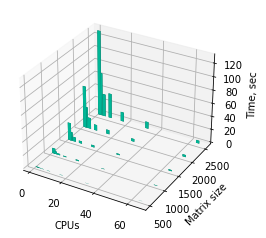

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel('Time, sec')
ax.set_ylabel('Matrix size')
ax.set_xlabel('CPUs')
ax.bar3d(XPos, YPos, ZPos, dx, dy, dz, color='#00ceaa')

In [95]:
import pandas as pd

In [96]:
cl = list(map(int,set(YPos)))
cl.sort()
index = list(map(int,set(XPos)))
index.sort()

df = pd.DataFrame(columns=cl, index=index)

for i,time in enumerate(dz):
    df.loc[int(XPos[i]),int(YPos[i])] = time

In [97]:
df

,512,1024,1536,2048,2560
1,0.983275,7.94087,26.8646,63.984,130.741
2,0.499148,4.04929,13.4056,32.4628,66.638
4,0.307038,2.03266,6.77118,16.8577,34.5711
8,0.213795,1.15509,3.60066,8.72821,38.1313
16,0.217886,1.53693,3.0977,6.39401,14.281
32,0.111074,0.434441,1.78602,4.21016,10.3748
64,0.0577048,0.494478,1.71442,3.25953,4.37407
